In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Урок 7
### Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга  
(ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату  
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

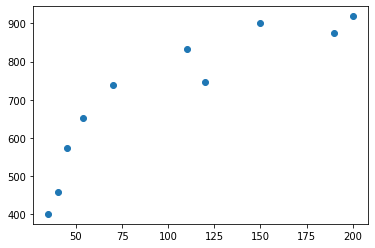

In [3]:
plt.scatter(zp, ks)
plt.show()

зависимость больше похожа на логарифмическую, однако задача про линейную регрессию  
первый вариант - без intercept  
y = bx

In [4]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

In [5]:
ks_hat = b * zp
ks_hat

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

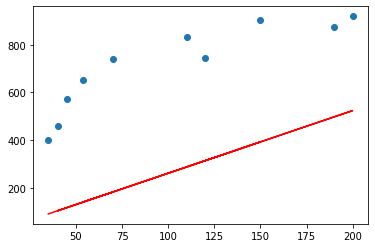

In [6]:
plt.scatter(zp, ks)
plt.plot(zp, ks_hat, color='r')
plt.show()

In [7]:
mse = np.mean((ks - ks_hat)**2)
mse

203763.93896082853

без intercept модель показала определенную зависимость, однако для использования не пригодна  

второй вариант - используя intercept  
y = a + bx

In [8]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

In [9]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

In [10]:
ks_hat = a + b * zp
ks_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

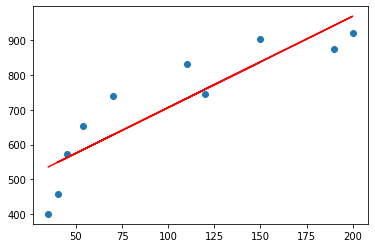

In [11]:
plt.scatter(zp, ks)
plt.plot(zp, ks_hat, color='r')
plt.show()

In [12]:
mse = np.mean((ks - ks_hat)**2)
mse

6470.414201176658

### Матричный метод

In [14]:
zp1 = np.reshape(zp, (zp.shape[0], 1))
ks1 = np.reshape(ks, (ks.shape[0], 1))
zp1 = np.hstack([np.ones((zp1.shape[0], 1)), zp1])
B = np.dot(np.linalg.inv(np.dot(zp1.T, zp1)), zp1.T@ks1)
print(B)

[[444.17735732]
 [  2.62053888]]


### Задание 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).